# Analysis and edge detection

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from image_utils import rgb2gray

### Loading images

In [2]:
lviv = mpimg.imread('../data/images/lviv.jpg')
prague = mpimg.imread('../data/images/prague.jpg')

In [3]:
type(lviv), type(prague)

(numpy.ndarray, numpy.ndarray)

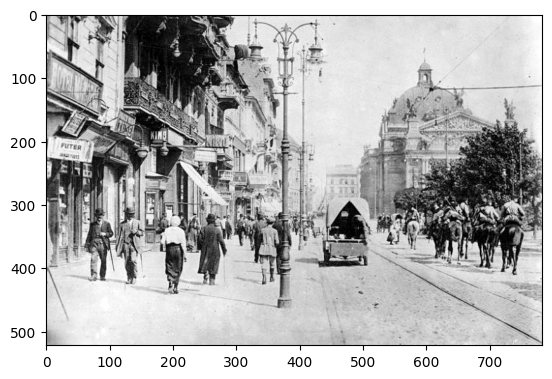

In [4]:
plt.imshow(lviv);

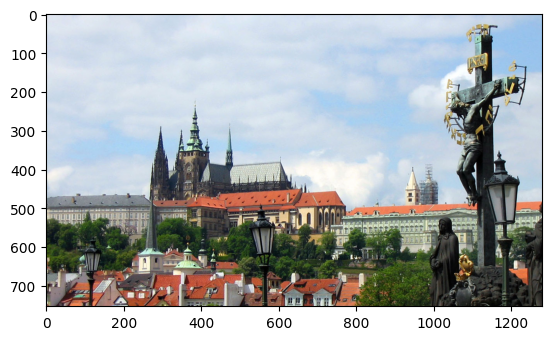

In [5]:
plt.imshow(prague);

In [6]:
lviv.shape, lviv.dtype

((522, 783, 3), dtype('uint8'))

In [7]:
prague.shape, prague.dtype

((753, 1280, 3), dtype('uint8'))

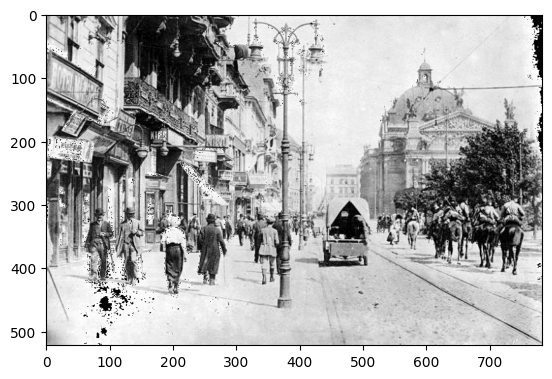

In [8]:
lviv = rgb2gray(lviv)
plt.imshow(lviv, cmap='gray')

In [9]:
lviv.shape, lviv.dtype

((522, 783), dtype('uint8'))